Boston 데이터셋 크기  (506, 14)


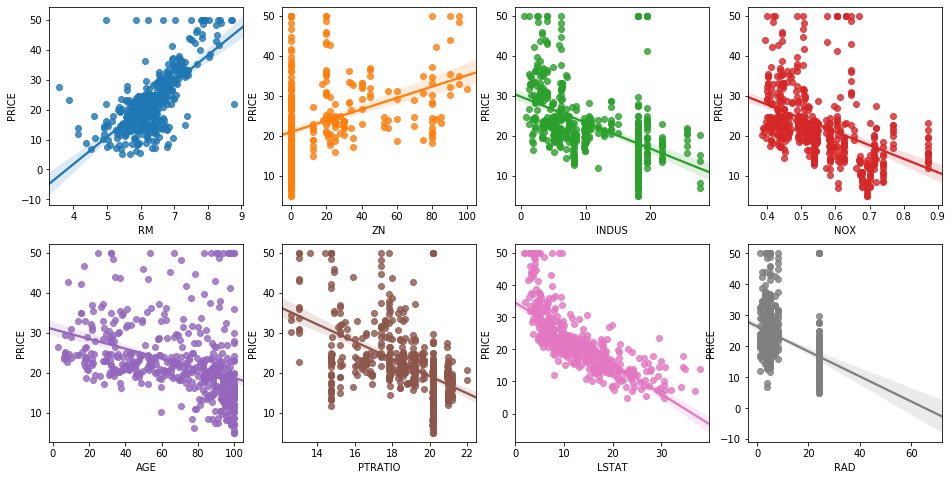

In [19]:
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
import pandas as pd

boston = load_boston()

bostonDF = pd.DataFrame(boston.data, columns = boston.feature_names)

bostonDF['PRICE'] = boston.target
print('Boston 데이터셋 크기 ', bostonDF.shape)
bostonDF.head()


fig, axs = plt.subplots(figsize=(16, 8), ncols=4, nrows=2)
lm_features =['RM', 'ZN', 'INDUS', 'NOX', 'AGE', 'PTRATIO', 'LSTAT', 'RAD']
for i, feature in enumerate(lm_features):
	row = int(i/4)
	col = i%4
	sns.regplot(x=feature, y='PRICE', data=bostonDF, ax=axs[row][col])

In [20]:
############scikit-learn의 	LinearRegression로 학습, 생성된 모델로 비용 계산 (모델 평가) #############
from sklearn.model_selection import train_test_split	
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

 
from sklearn.model_selection import train_test_split	
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

 
y_target = boston.target 
X_data = boston.data 
 
X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.3, random_state = 156)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print("MSE: {0:.4f}, RMSE:{1:.4f}".format(mse, rmse))
print('Variance score: {0:.4f}'.format(r2_score(y_test, y_preds)))

MSE: 17.2969, RMSE:4.1590
Variance score: 0.7572


In [21]:
print('절편 값:', lr.intercept_)
print('회귀 계수 값 : ', np.round(lr.coef_, 1))

절편 값: 40.99559517216412
회귀 계수 값 :  [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [22]:
#회귀계수가 큰 값순으로 정렬

coeff = pd.Series(data=np.round(lr.coef_,1), index=boston.feature_names)
coeff.sort_values(ascending=False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
B           0.0
TAX        -0.0
AGE         0.0
INDUS       0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

In [23]:
#교차검증으로 오차 비용 계산
from sklearn.model_selection import cross_val_score

#폴드 수 5, mse, rmse 계산
neg_mean_scores = cross_val_score(lr, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1*neg_mean_scores)
avg_rmse = np.mean(rmse_scores)

print('5 folds의 개별 negative MSE scores:', np.round(neg_mean_scores,2))
print('5 folds의 개별 RMSE scores:', np.round(rmse_scores,2))
print('5 folds의 평균 RMSE scores:', np.round(avg_rmse,2))

5 folds의 개별 negative MSE scores: [-12.46 -26.05 -33.07 -80.76 -33.31]
5 folds의 개별 RMSE scores: [3.53 5.1  5.75 8.99 5.77]
5 folds의 평균 RMSE scores: 5.83


In [25]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha = 10)
#폴드 수 5,  mse, rmse 계산
neg_mean_scores = cross_val_score(ridge, X_data, y_target, scoring='neg_mean_squared_error', cv=5) 
rmse_scores = np.sqrt(-1*neg_mean_scores)
avg_rmse = np.mean(rmse_scores)

print('5 folds 의 개별 negative MSE scores:', np.round(neg_mean_scores, 2))
print('5 folds 의 개별 RMSE scores:', np.round(rmse_scores, 2))
print('5 folds 의 평균 RMSE scores:', np.round(avg_rmse, 2))	

5 folds 의 개별 negative MSE scores: [-11.42 -24.29 -28.14 -74.6  -28.52]
5 folds 의 개별 RMSE scores: [3.38 4.93 5.31 8.64 5.34]
5 folds 의 평균 RMSE scores: 5.52


In [27]:
# alpha = [0,0.1,1,10,100]
# 폴드 수 5, 평균 rmse계산 출력

alphas = [0,0.1,1,10,100]
for alpha in alphas:
    neg_mean_scores = cross_val_score(ridge, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
    avg_rmse = np.mean(np.sqrt(-1*neg_mean_scores))
    print('5 folds 의 평균 RMSE scores:', np.round(avg_rmse,2))

5 folds 의 평균 RMSE scores: 5.52
5 folds 의 평균 RMSE scores: 5.52
5 folds 의 평균 RMSE scores: 5.52
5 folds 의 평균 RMSE scores: 5.52
5 folds 의 평균 RMSE scores: 5.52


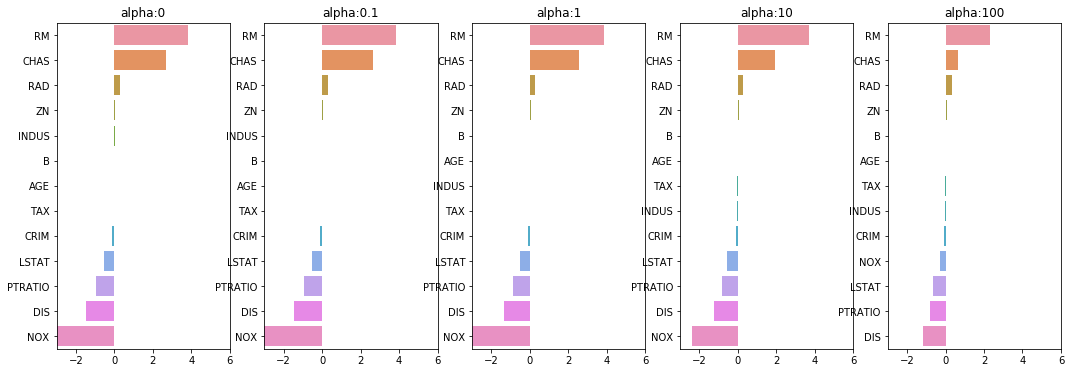

In [32]:

# alphas값에 따라 13특성의 계수의 변화률(크기를 줄이는..)
fig, axs = plt.subplots(figsize=(18, 6), nrows=1, ncols=5)
coeff_df = pd.DataFrame()
X_data = pd.DataFrame(boston.data, columns = boston.feature_names)
 
for pos, alpha  in enumerate(alphas):
	ridge = Ridge(alpha=alpha)
	ridge.fit(X_data, y_target)
	coeff = pd.Series(data=ridge.coef_, index=X_data.columns)
	colname = 'alpha:'+str(alpha)
	coeff_df[colname] = coeff
	
	coeff = coeff.sort_values(ascending=False)
	axs[pos].set_title(colname)
	axs[pos].set_xlim(-3, 6)
	sns.barplot(x=coeff.values, y=coeff.index, ax=axs[pos])
	
plt.show()

In [33]:
ridge_alphas = [0,0.1,1,10,100]
sort_columns = 'alpha:'+str(ridge_alphas[0])
coeff_df.sort_values(by=sort_column,ascending=False)


NameError: name 'sort_column' is not defined

In [35]:
from sklearn.linear_model import Lasso, ElasticNet

# alpha값에 따른 회귀 모델의 폴드 평균 RMSE를 출력하고 회귀 계수값들을 DataFrame으로 반환 
def get_linear_reg_eval(model_name, params=None, X_data_n=None, y_target_n=None, verbose=True):
    coeff_df = pd.DataFrame()
    if verbose : print('####### ', model_name , '#######')
    for param in params:
        if model_name =='Ridge': model = Ridge(alpha=param)
        elif model_name =='Lasso': model = Lasso(alpha=param)
        elif model_name =='ElasticNet': model = ElasticNet(alpha=param, l1_ratio=0.7)
        neg_mse_scores = cross_val_score(model, X_data_n, 
                                             y_target_n, scoring="neg_mean_squared_error", cv = 5)
        avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
        print('alpha {0}일 때 5 폴드 세트의 평균 RMSE: {1:.3f} '.format(param, avg_rmse))
        # cross_val_score는 evaluation metric만 반환하므로 모델을 다시 학습하여 회귀 계수 추출
        model.fit(X_data , y_target)
        # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가. 
        coeff = pd.Series(data=model.coef_ , index=X_data.columns )
        colname='alpha:'+str(param)
        coeff_df[colname] = coeff
    return coeff_df
# end of get_linear_regre_eval

In [36]:
#엘라스틱넷 회귀
lasso_alphas = [0.07,0.1,0.5,1,3]
coeff_lasso_df =get_linear_reg_eval('Lasso', params=lasso_alphas, X_data_n=X_data, y_target_n=y_target)



# 반환된 coeff_lasso_df를 첫번째 컬럼순으로 내림차순 정렬하여 회귀계수 DataFrame출력
sort_column = 'alpha:'+str(lasso_alphas[0])
coeff_lasso_df.sort_values(by=sort_column, ascending=False)


#######  Lasso #######
alpha 0.07일 때 5 폴드 세트의 평균 RMSE: 5.612 
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.615 
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 5.669 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.776 
alpha 3일 때 5 폴드 세트의 평균 RMSE: 6.189 


,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.789725,3.703202,2.498212,0.949811,0.000000
CHAS,1.434343,0.955190,0.000000,0.000000,0.000000
RAD,0.270936,0.274707,0.277451,0.264206,0.061864
ZN,0.049059,0.049211,0.049544,0.049165,0.037231
B,0.010248,0.010249,0.009469,0.008247,0.006510
NOX,-0.000000,-0.000000,-0.000000,-0.000000,0.000000
AGE,-0.011706,-0.010037,0.003604,0.020910,0.042495
TAX,-0.014290,-0.014570,-0.015442,-0.015212,-0.008602
INDUS,-0.042120,-0.036619,-0.005253,-0.000000,-0.000000
CRIM,-0.098193,-0.097894,-0.083289,-0.063437,-0.000000


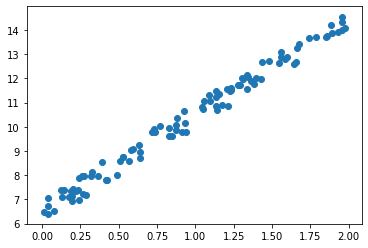

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


np.random.seed(0)
X = 2*np.random.rand(100, 1)  #샘플 데이터 feature 생성
#y=4X+6+노이즈   
y = 6 +4*X + np.random.rand(100, 1)

plt.scatter(X, y) #시각화

#경사하강법을 사용해서 비용함수가 최소가 되는 선형관계의 식을 찾아 시각화
# w1과 s0을 업데이트할  w1_updates, w0_update를 반환
def get_weight_updates(w1, w0, X, y, learning_rate=0.01):
	N = len(y)
	w1_update =np.zeros_like(w1)
	w0_update = np.zeros_like(w0)
	y_pred=np.dot(X, w1.T) +w0
	diff = y-y_pred
	
	w0_factors = np.ones((N, 1))   
	
	w1_updates = -(2/N)*learning_rate*(np.dot(X.T, diff))
	w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T, diff))
	return w1_update, w0_update


In [2]:
def gradient_descent_steps(X, y,iters=10000) :
	w0=np.zeros((1, 1))
	w1=np.zeros((1, 1))
	for ind in range(iters):
		w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate=0.01)
		w1 = w1-w1_update
		w0 = w0-w0_update
	return w1, w0

In [3]:
#오차 비용 계산 - RMSE(실제-예측값) 제곱의 합의 평균에 루트를 씌운거
def get_cost(y, y_pred):
	N = len(y)
	cost = np.sum(np.square(y-y_pred)) / N
	return cost

In [4]:
w1, w0 = gradient_descent_steps(X, y, iters=1000)
print("w1:{0:.4f} w0:{1:.4f}".format(w1[0,0], w0[0, 0]))

w1:0.0000 w0:10.3104


In [5]:
y_pred = w1[0,0] *X + w0[0,0]
print("Gradient Descent Total cost :{0:.4f}".format(get_cost(y, y_pred)))


Gradient Descent Total cost :5.3117


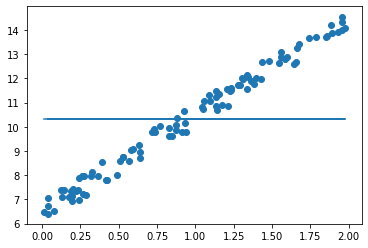

In [6]:
plt.scatter(X, y)
plt.plot(X, y_pred)
